# Análisis de Desempeño del Algoritmo BFOA

In [11]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from multiprocessing import Manager
from bacteria import bacteria
from fastaReader import fastaReader

In [12]:
# Parámetros ajustables
numeroDeBacterias = 4
iteraciones = 3
tumbo = 200
dAttr = 0.1
wAttr = 0.002
dRepel = 0.1
wRepel = 0.001
corridas = 30

In [13]:
# Leer archivo FASTA
reader = fastaReader()
secuencias = [list(seq) for seq in reader.seqs]
numSec = len(secuencias)

In [14]:
def ejecutar_bfoa():
    manager = Manager()
    poblacion = manager.list(range(numeroDeBacterias))
    for i in range(numeroDeBacterias):
        bacterium = []
        for j in range(numSec):
            bacterium.append(secuencias[j])
        poblacion[i] = list(bacterium)

    operadorBacterial = bacteria(numeroDeBacterias)
    veryBest = [None, None, None]
    globalNFE = 0

    start_time = time.time()

    for it in range(iteraciones):
        operadorBacterial.tumbo(numSec, poblacion, tumbo)
        operadorBacterial.cuadra(numSec, poblacion)
        operadorBacterial.creaGranListaPares(poblacion)
        operadorBacterial.evaluaBlosum()
        operadorBacterial.creaTablasAtractRepel(poblacion, dAttr, wAttr, dRepel, wRepel)
        operadorBacterial.creaTablaInteraction()
        operadorBacterial.creaTablaFitness()
        globalNFE += operadorBacterial.getNFE()
        bestIdx, bestFitness = operadorBacterial.obtieneBest(globalNFE)
        if (veryBest[0] is None) or (bestFitness > veryBest[1]):
            veryBest[0] = bestIdx
            veryBest[1] = bestFitness
            veryBest[2] = deepcopy(poblacion[bestIdx])
        operadorBacterial.replaceWorst(poblacion, veryBest[0])
        operadorBacterial.resetListas(numeroDeBacterias)

    end_time = time.time()
    tiempo = end_time - start_time
    return {
        "fitness": veryBest[1],
        "tiempo": tiempo,
        "blosum": operadorBacterial.blosumScore[veryBest[0]],
        "interaccion": operadorBacterial.tablaInteraction[veryBest[0]]
    }

In [15]:
# Ejecutar múltiples corridas
resultados = []
for i in range(corridas):
    print(f"Ejecutando corrida {i+1}/{corridas}...")
    resultado = ejecutar_bfoa()
    resultados.append(resultado)

df = pd.DataFrame(resultados)
df.head()

Ejecutando corrida 1/30...
-------------------   Best:  3  Fitness:  16.4 BlosumScore  13.0 Interaction:  3.4 NFE:  38
-------------------   Best:  3  Fitness:  16.4 BlosumScore  13.0 Interaction:  3.4 NFE:  76
-------------------   Best:  3  Fitness:  16.4 BlosumScore  13.0 Interaction:  3.4 NFE:  114
Ejecutando corrida 2/30...
-------------------   Best:  3  Fitness:  16.4 BlosumScore  13.0 Interaction:  3.4 NFE:  37
-------------------   Best:  3  Fitness:  16.440214050340533 BlosumScore  13.0 Interaction:  3.440214050340532 NFE:  75
-------------------   Best:  3  Fitness:  16.686514810175524 BlosumScore  13.0 Interaction:  3.686514810175524 NFE:  113
Ejecutando corrida 3/30...
-------------------   Best:  3  Fitness:  16.4 BlosumScore  13.0 Interaction:  3.4 NFE:  38
-------------------   Best:  3  Fitness:  16.4 BlosumScore  13.0 Interaction:  3.4 NFE:  75
-------------------   Best:  3  Fitness:  16.4 BlosumScore  13.0 Interaction:  3.4 NFE:  112
Ejecutando corrida 4/30...
-----

,fitness,tiempo,blosum,interaccion
0,16.400000,18.356981,3,3
1,16.686515,17.701355,3,3
2,16.400000,17.722635,3,3
3,19.841262,18.546508,3,3
4,28.394710,17.827486,2,2


In [16]:
# Estadísticas descriptivas
display(df.describe())

,fitness,tiempo,blosum,interaccion
count,30.000000,30.000000,30.000000,30.000000
mean,18.290854,21.365861,2.733333,2.733333
std,3.620134,2.331154,0.449776,0.449776
min,16.400000,17.701355,2.000000,2.000000
25%,16.410931,20.543596,2.250000,2.250000
50%,16.637288,21.426259,3.000000,3.000000
75%,18.568673,22.565405,3.000000,3.000000
max,30.103729,27.908804,3.000000,3.000000


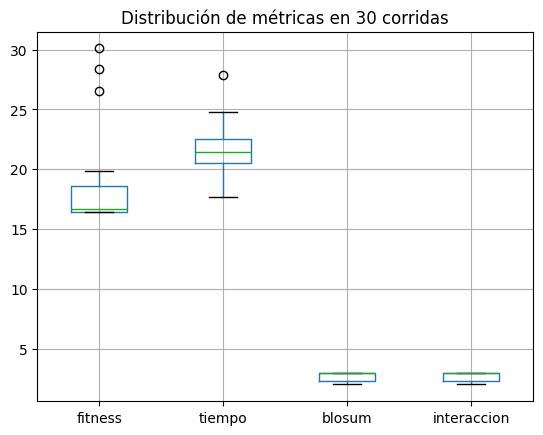

In [17]:
# Gráfica de distribucion de métricas
plt.figure()
df.boxplot(column=["fitness", "tiempo", "blosum", "interaccion"])
plt.title("Distribución de métricas en 30 corridas")
plt.show()

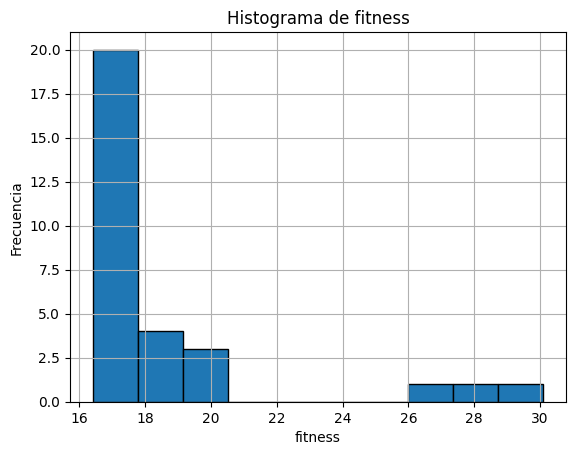

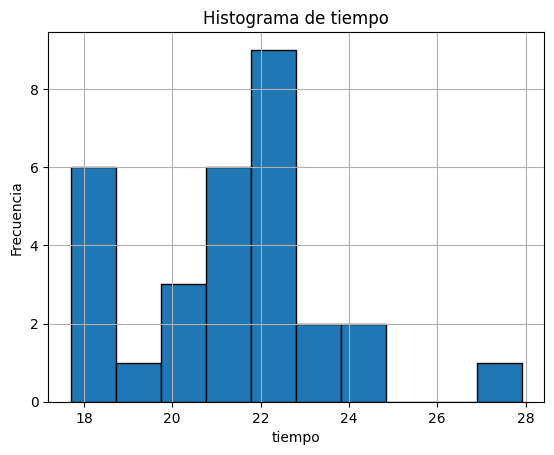

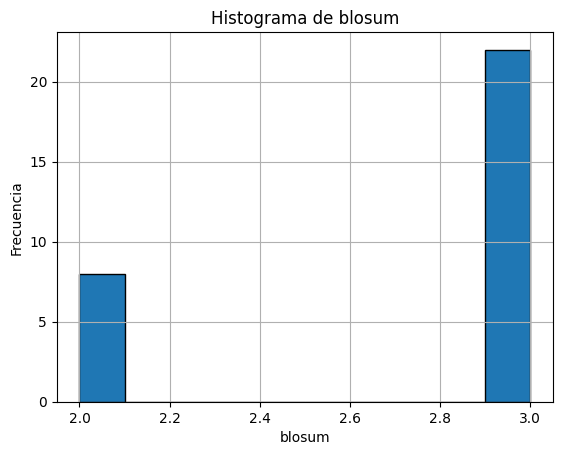

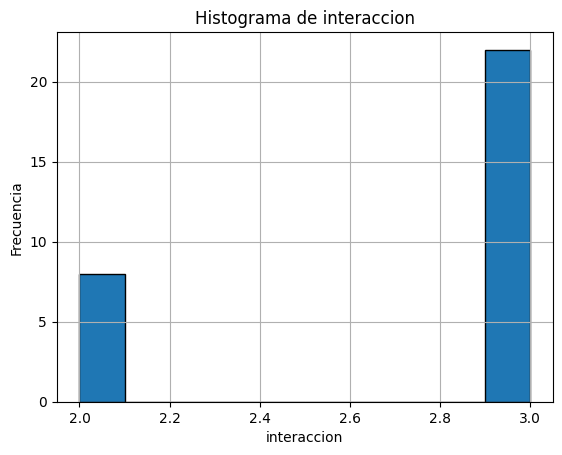

In [18]:
# Histograma por métrica
metrics = ["fitness", "tiempo", "blosum", "interaccion"]

for metric in metrics:
    plt.figure()
    df[metric].hist(bins=10, edgecolor='black')
    plt.title(f"Histograma de {metric}")
    plt.xlabel(metric)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

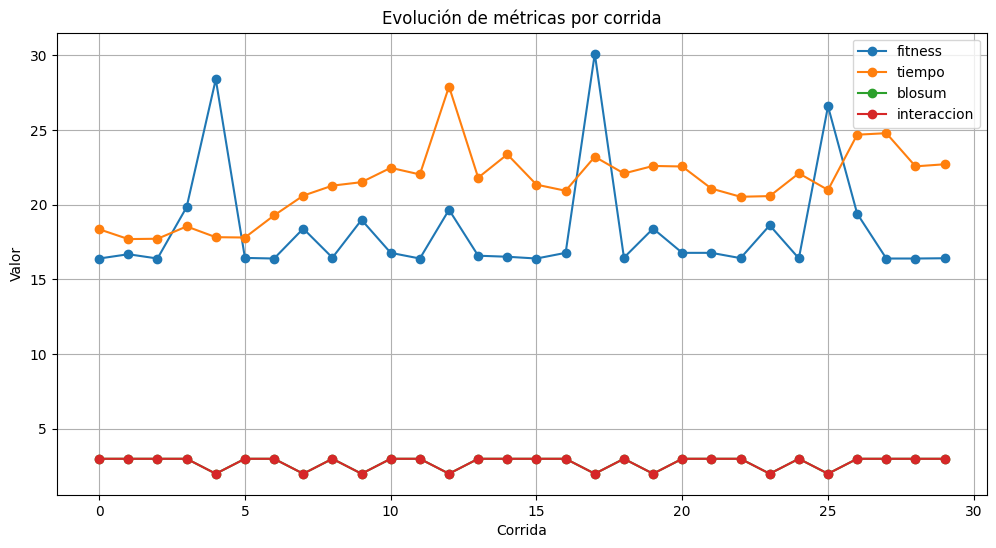

In [19]:
# Evolucion corrida por corrida
plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(df[metric], label=metric, marker='o')
plt.title("Evolución de métricas por corrida")
plt.xlabel("Corrida")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

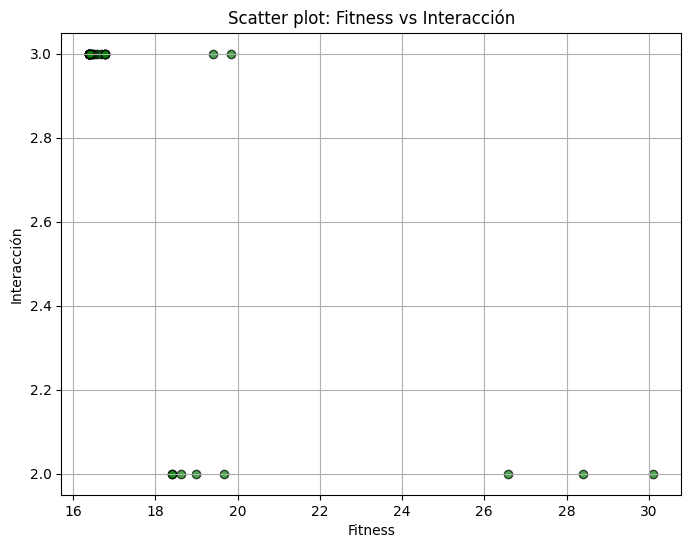

In [20]:
# Scatter plot: Fitness vs Interacción
plt.figure(figsize=(8, 6))
plt.scatter(df["fitness"], df["interaccion"], c='green', alpha=0.7, edgecolors='black')
plt.title("Scatter plot: Fitness vs Interacción")
plt.xlabel("Fitness")
plt.ylabel("Interacción")
plt.grid(True)
plt.show()

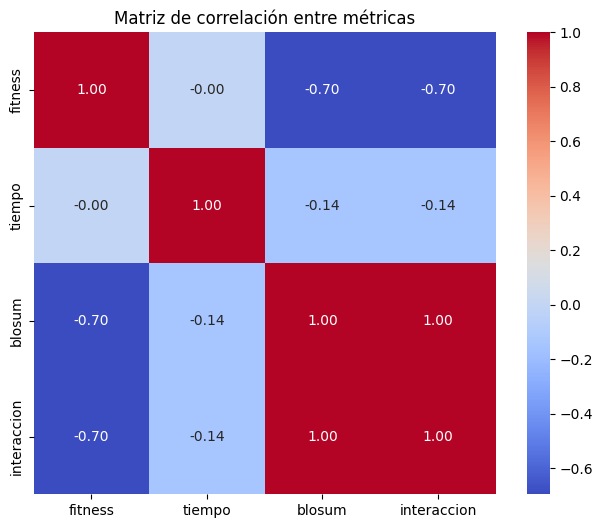

In [21]:
# Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de correlación entre métricas")
plt.show()

In [22]:
# Guardar resultados en CSV
df.to_csv("Data/Resultados_BFOA.csv", index=False)